In [443]:
import os,codecs
import pandas as pd
import nltk
from nltk import*
import matplotlib.pyplot as plt
import string
import numpy as np
import seaborn as sns

# Data Cleaning and Preprocessing

- reading the data
- split the labels into three columns:label_1, label_2, label_3
- fill the missing values in label_2 with the corresponding values in label_1
- data cleaning: removing the punctuations and the stopwords
- tokenization

In [444]:
df = pd.read_csv("XED.txt",  error_bad_lines=False, sep= '\t', header= None, names = ["sent", "label_1"])

In [445]:
df.shape

(17528, 2)

In [446]:
df[["label_1", "label_2"]] = df['label_1'].str.split(",", 1, expand=True)
df[["label_2", "label_3"]] = df['label_2'].str.split(",", 1, expand=True)

In [447]:
df.head()

,sent,label_1,label_2,label_3
0,", ...",1,None,None
1,!,1,4,7
2,... And I don't think we need to discuss the T...,8,1,None
3,* So get up out of your bed,1,None,None
4,A confession that you hired [PERSON] ... and a...,1,6,None


In [448]:
df["label_1"] = pd.to_numeric(df["label_1"])
df["label_2_fill"] = np.where(df.label_2.isnull(), df.label_1, df.label_2)
df["label_2_fill"] = pd.to_numeric(df["label_2_fill"])

In [449]:
lst_stopwords = nltk.corpus.stopwords.words("english")

In [450]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    
               
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    table = str.maketrans('', '', string.punctuation)
    lst_text = [w.translate(table) for w in lst_text]
                   
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [451]:
df["text_clean"] = df["sent"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords= lst_stopwords))

In [452]:
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row["text_clean"]), axis=1)
df.head()

,sent,label_1,label_2,label_3,label_2_fill,text_clean,tokenized_sents
0,", ...",1,None,None,1,,[]
1,!,1,4,7,4,,[]
2,... And I don't think we need to discuss the T...,8,1,None,1,and i dont think we need to discuss the trinit...,"[and, i, dont, think, we, need, to, discuss, t..."
3,* So get up out of your bed,1,None,None,1,so get up out of your bed,"[so, get, up, out, of, your, bed]"
4,A confession that you hired [PERSON] ... and a...,1,6,None,6,a confession that you hired person and are res...,"[a, confession, that, you, hired, person, and,..."


# SentiArt Calculations

* The Hit Rate (92.453 %)

In [453]:
TC = "250kSentiArt_EN.xlsx"

In [454]:
sa = pd.read_excel(TC)

In [455]:
sa.head()

,word,AAPz,ang_z,fear_z,disg_z,hap_z,sad_z,surp_z
0,a,-0.635,1.569,1.047,0.844,1.649,1.820,0.154
1,aa,-1.402,-0.916,-0.349,-1.284,-1.335,-1.525,-1.610
2,aaa,-1.287,-0.624,-0.063,-0.641,-1.227,-1.132,-1.194
3,aaaaah,-0.329,-0.400,-0.021,-0.134,0.565,0.372,-0.364
4,aaaam,0.016,-0.592,0.513,-0.800,-0.741,-1.194,-0.686


In [456]:
sa.shape

(241493, 8)

In [457]:
sent_mean_ang_z = []
sent_mean_fear_z = []
sent_mean_disg_z = []
sent_mean_hap_z = []
sent_mean_sad_z = []
sent_mean_surp_z = []
sent_mean_APPz = []

In [458]:
my_list = []
for sent in df.tokenized_sents:
    my_list.append(sent)
    
len(my_list)

17528

In [465]:
word_list = []
for sent in my_list:
    for word in sent:
        word_list.append(word)
print(len(word_list))
print(len(set(word_list)))

130534
8586


In [459]:
senti_words = []
for word in sa.word:
    senti_words.append(word)
print(len(senti_words))

241493


In [466]:
match_senti = []
for word in set(word_list):
    if word in senti_words:
        match_senti.append(word)
print(len(match_senti))

7938


In [467]:
print("The hit rate of SentiArt = ", round(len(match_senti)*100/len(set(word_list)),3), "%)")

The hit rate of SentiArt =  92.453 %)


In [344]:
for t in my_list:
    dt = sa.query('word in @t')
    sent_mean_ang_z.append(dt.ang_z.mean())
    sent_mean_fear_z.append(dt.fear_z.mean())
    sent_mean_disg_z.append(dt.disg_z.mean())
    sent_mean_hap_z.append(dt.hap_z.mean())
    sent_mean_sad_z.append(dt.sad_z.mean())
    sent_mean_surp_z.append(dt.surp_z.mean())
    sent_mean_APPz.append(dt.AAPz.mean())

In [345]:
df["ang"] = sent_mean_ang_z
df["fear"] = sent_mean_fear_z
df["disg"] = sent_mean_disg_z
df["hap"] = sent_mean_hap_z
df["sad"] = sent_mean_sad_z
df["surp"] = sent_mean_surp_z
df["APPz"] = sent_mean_APPz
df = round(df,3)

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17528 entries, 0 to 17527
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sent             17528 non-null  object 
 1   label_1          17528 non-null  int64  
 2   label_2          3873 non-null   object 
 3   label_3          849 non-null    object 
 4   label_2_fill     17528 non-null  int64  
 5   text_clean       17528 non-null  object 
 6   tokenized_sents  17528 non-null  object 
 7   ang              17490 non-null  float64
 8   fear             17490 non-null  float64
 9   disg             17490 non-null  float64
 10  hap              17490 non-null  float64
 11  sad              17490 non-null  float64
 12  surp             17490 non-null  float64
 13  APPz             17490 non-null  float64
dtypes: float64(7), int64(2), object(5)
memory usage: 1.9+ MB


In [347]:
print(df.ang.isna().sum())      
print(df.fear.isna().sum())   
print(df.disg.isna().sum()) 
print(df.hap.isna().sum())
print(df.sad.isnull().sum())
print(df.surp.isnull().sum())

38
38
38
38
38
38


In [348]:
df_38 = df.loc[pd.isna(df["disg"]), :]
df_38.head()

,sent,label_1,label_2,label_3,label_2_fill,text_clean,tokenized_sents,ang,fear,disg,hap,sad,surp,APPz
0,", ...",1,None,None,1,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,!,1,4,7,4,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,Argh ! Kaili !,1,None,None,1,argh kaili,"[argh, kaili]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,Bullshit !,1,3,None,3,bullshit,[bullshit],NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,Bullshit .,1,7,None,7,bullshit,[bullshit],NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [349]:
#df_38.to_csv('df_38.csv')

In [350]:
df = df[["text_clean", "label_1", "label_2_fill", "ang", "fear", "disg", "hap", "sad", "surp", "APPz"]]

In [351]:
df = df.dropna().reset_index(drop=True)
df.shape

(17490, 10)

* Mapping the target column based on the mapping of XED.

* Removing the missing values.

* Exploring the distribution of the classes in label_1 and label_2 from XED and the target of SentiArt 

* Data Exploration


In [352]:
df["target"] = df[["ang", "fear", "disg", "hap", "sad", "surp"]].idxmax(axis=1)
df["target_name"] = df[["ang", "fear", "disg", "hap", "sad", "surp"]].idxmax(axis=1)

In [353]:
emo_map = {"ang": int(1), "fear": int(4), "disg": int(3), "hap": int(5), "sad" : int(6), "surp": int(7)}
df = df.replace({"target": emo_map})
df.head()

,text_clean,label_1,label_2_fill,ang,fear,disg,hap,sad,surp,APPz,target,target_name
0,and i dont think we need to discuss the trinit...,8,1,0.240,1.354,-0.002,0.818,0.657,-0.216,-0.540,4,fear
1,so get up out of your bed,1,1,0.524,0.638,0.129,0.776,0.422,-0.158,-0.460,5,hap
2,a confession that you hired person and are res...,1,6,0.893,0.984,0.449,1.317,0.941,0.052,-1.051,5,hap
3,a dead man has one half hour to raise his roll...,1,1,0.531,0.532,0.192,0.705,0.810,-0.044,-0.395,6,sad
4,a guy thats talking about hes gonna solve all ...,1,1,-0.040,0.501,-0.145,0.766,0.492,0.010,-0.281,5,hap


In [354]:
df.target.value_counts()

4    7154
5    6243
6    2482
7     941
1     578
3      92
Name: target, dtype: int64

In [355]:
df.label_1.value_counts()

1    3703
2    2706
8    2684
5    1843
4    1791
6    1702
3    1639
7    1422
Name: label_1, dtype: int64

In [356]:
df.label_2_fill.value_counts()

2    2701
5    2516
1    2486
7    2080
6    2048
3    2028
4    2016
8    1615
Name: label_2_fill, dtype: int64

In [357]:
df_anger = df.loc[df["label_1"] == 1]
df_anger["target_name"].value_counts()

fear    1724
hap     1219
sad      427
surp     161
ang      151
disg      21
Name: target_name, dtype: int64

In [358]:
df_anticipation = df.loc[df["label_1"] == 2]
df_anticipation["target_name"].value_counts()

fear    1110
hap     1024
sad      352
surp     168
ang       40
disg      12
Name: target_name, dtype: int64

In [359]:
df_disgust = df.loc[df["label_1"] == 3]
df_disgust["target_name"].value_counts()

hap     592
fear    589
sad     295
ang      94
surp     44
disg     25
Name: target_name, dtype: int64

In [360]:
df_fear = df.loc[df["label_1"] == 4]
df_fear["target_name"].value_counts()

fear    886
hap     464
sad     258
ang      97
surp     77
disg      9
Name: target_name, dtype: int64

In [361]:
df_joy = df.loc[df["label_1"] == 5]
df_joy.target_name.value_counts()

hap     891
fear    371
sad     358
surp    188
ang      32
disg      3
Name: target_name, dtype: int64

In [362]:
df_sad = df.loc[df["label_1"] == 6]
df_sad.target_name.value_counts()

fear    829
hap     455
sad     284
surp     72
ang      57
disg      5
Name: target_name, dtype: int64

In [363]:
df_surp = df.loc[df["label_1"] == 7]
df_surp.target_name.value_counts()

fear    528
hap     458
sad     258
surp    110
ang      59
disg      9
Name: target_name, dtype: int64

In [364]:
df_trust = df[df["label_1"] == 8]
df_trust.target_name.value_counts()

hap     1140
fear    1117
sad      250
surp     121
ang       48
disg       8
Name: target_name, dtype: int64

In [365]:
df_anger_2 = df[df["label_2_fill"] == 1]
df_anger_2.target_name.value_counts()                 

fear    1204
hap      792
sad      279
surp     107
ang       94
disg      10
Name: target_name, dtype: int64

In [366]:
df_antic_2 = df[df["label_2_fill"] == 2]
df_antic_2.target_name.value_counts()

fear    1135
hap     1033
sad      328
surp     152
ang       43
disg      10
Name: target_name, dtype: int64

In [367]:
df_disg_2 = df[df["label_2_fill"] == 3]
df_disg_2.target_name.value_counts()

fear    757
hap     749
sad     335
ang     105
surp     55
disg     27
Name: target_name, dtype: int64

In [368]:
df_fear_2 = df[df["label_2_fill"] == 4]
df_fear_2.target_name.value_counts()

fear    991
hap     542
sad     277
ang     106
surp     86
disg     14
Name: target_name, dtype: int64

In [369]:
df_hap_2 = df[df["label_2_fill"] == 5]
df_hap_2.target_name.value_counts()

hap     1209
fear     597
sad      417
surp     241
ang       46
disg       6
Name: target_name, dtype: int64

In [370]:
df_sad_2 = df[df["label_2_fill"] == 6]
df_sad_2.target_name.value_counts()

fear    995
hap     556
sad     331
surp     87
ang      72
disg      7
Name: target_name, dtype: int64

In [371]:
df_surp_2 = df[df["label_2_fill"] == 7]
df_surp_2.target_name.value_counts()

fear    774
hap     688
sad     369
surp    153
ang      84
disg     12
Name: target_name, dtype: int64

In [372]:
df_trust_2 = df[df["label_2_fill"] == 8]
df_trust_2.target_name.value_counts()

fear    701
hap     674
sad     146
surp     60
ang      28
disg      6
Name: target_name, dtype: int64

# Classification

* fear vs the rest
* happiness vs the rest
* sadness vs the rest

In [373]:
df["label_fear"] = df["label_1"].map({1:0, 2:0, 3:0, 4:1, 5:0, 6:0, 7:0, 8:0})

In [374]:
df["target_fear"] = df["target"].map({1:0, 3:0, 4:1, 5:0, 6:0, 7:0})

In [375]:
df.target_fear.value_counts()

0    10336
1     7154
Name: target_fear, dtype: int64

In [376]:
df.label_fear.value_counts()

0    15699
1     1791
Name: label_fear, dtype: int64

In [377]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [378]:
X = df["text_clean"]
y_target = df["target_fear"]
y_label = df["label_fear"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [379]:
# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# LogisticRegression 
text_clf_lr = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),
])

In [380]:
print("Report of MultinomialNB_fear")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB_fear
Confusion Matrix 
 [[3143 1578]
 [ 316  210]]
              precision    recall  f1-score   support

           0       0.91      0.67      0.77      4721
           1       0.12      0.40      0.18       526

    accuracy                           0.64      5247
   macro avg       0.51      0.53      0.47      5247
weighted avg       0.83      0.64      0.71      5247

Accuracy Score:  0.639031827711073


In [381]:
print("Report of LinearSVC_fear")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC_fear
Confusion Matrix 
 [[2789 1932]
 [ 276  250]]
              precision    recall  f1-score   support

           0       0.91      0.59      0.72      4721
           1       0.11      0.48      0.18       526

    accuracy                           0.58      5247
   macro avg       0.51      0.53      0.45      5247
weighted avg       0.83      0.58      0.66      5247

Accuracy Score:  0.5791881074899943


In [382]:
print("Report of LogisticRegression_fear")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression_fear
Confusion Matrix 
 [[3006 1715]
 [ 315  211]]
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      4721
           1       0.11      0.40      0.17       526

    accuracy                           0.61      5247
   macro avg       0.51      0.52      0.46      5247
weighted avg       0.83      0.61      0.69      5247

Accuracy Score:  0.6131122546216886


In [383]:
df["label_hap"] = df["label_1"].map({1:0, 2:0, 3:0, 4:0, 5:1, 6:0, 7:0, 8:0})
df["target_hap"] = df["target"].map({1:0, 3:0, 4:0, 5:1, 6:0, 7:0})

In [384]:
df.target_hap.value_counts()

0    11247
1     6243
Name: target_hap, dtype: int64

In [385]:
df.label_hap.value_counts()

0    15647
1     1843
Name: label_hap, dtype: int64

In [386]:
X = df["text_clean"]
y_target = df["target_hap"]
y_label = df["label_hap"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [387]:
print("Report of MultinomialNB_hap")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score:", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB_hap
Confusion Matrix 
 [[4175  509]
 [ 445  118]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4684
           1       0.19      0.21      0.20       563

    accuracy                           0.82      5247
   macro avg       0.55      0.55      0.55      5247
weighted avg       0.83      0.82      0.82      5247

Accuracy Score: 0.8181818181818182


In [388]:
print("Report of LinearSVC_hap")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC_hap
Confusion Matrix 
 [[3169 1515]
 [ 298  265]]
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      4684
           1       0.15      0.47      0.23       563

    accuracy                           0.65      5247
   macro avg       0.53      0.57      0.50      5247
weighted avg       0.83      0.65      0.72      5247

Accuracy Score 0.6544692205069563


In [389]:
print("Report of LogisticRegression_hap")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression_hap
Confusion Matrix 
 [[3376 1308]
 [ 334  229]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      4684
           1       0.15      0.41      0.22       563

    accuracy                           0.69      5247
   macro avg       0.53      0.56      0.51      5247
weighted avg       0.83      0.69      0.74      5247

Accuracy Score 0.6870592719649323


In [390]:
df["label_sad"] = df["label_1"].map({1:0, 2: 0, 3:0, 4:0, 5:0, 6:1, 7:0, 8:0})
df["target_sad"] = df["target"].map({1:0, 3:0, 4:0, 5:0, 6:1, 7:0})

In [391]:
df.target_sad.value_counts()

0    15008
1     2482
Name: target_sad, dtype: int64

In [392]:
df.label_sad.value_counts()

0    15788
1     1702
Name: label_sad, dtype: int64

In [393]:
X = df["text_clean"]
y_target = df["target_sad"]
y_label = df["label_sad"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [394]:
print("Report of MultinomialNB_sad")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score:", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB_sad
Confusion Matrix 
 [[4735    3]
 [ 509    0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      4738
           1       0.00      0.00      0.00       509

    accuracy                           0.90      5247
   macro avg       0.45      0.50      0.47      5247
weighted avg       0.82      0.90      0.86      5247

Accuracy Score: 0.9024204307223175


In [395]:
print("Report of LinearSVC_sad")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC_sad
Confusion Matrix 
 [[4289  449]
 [ 454   55]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4738
           1       0.11      0.11      0.11       509

    accuracy                           0.83      5247
   macro avg       0.51      0.51      0.51      5247
weighted avg       0.83      0.83      0.83      5247

Accuracy Score 0.8279016580903373


In [396]:
print("Report of LogisticRegression_sad")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression_sad
Confusion Matrix 
 [[4502  236]
 [ 470   39]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4738
           1       0.14      0.08      0.10       509

    accuracy                           0.87      5247
   macro avg       0.52      0.51      0.51      5247
weighted avg       0.83      0.87      0.85      5247

Accuracy Score 0.8654469220506956


# SentArt vs label_2

* the same steps but comparing to the label_2 (provides another annotation for about 20% of the data)

In [397]:
df["label_fear_2"] = df["label_2_fill"].map({1: 0, 2: 0, 3:0, 4:1, 5:0, 6:0, 7:0, 8:0})
X = df["text_clean"]
y_target = df["target_fear"]
y_label = df["label_fear_2"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [398]:
print(df.label_fear_2.value_counts())
print(df.target_fear.value_counts())


0    15474
1     2016
Name: label_fear_2, dtype: int64
0    10336
1     7154
Name: target_fear, dtype: int64


In [399]:
print("Report of MultinomialNB_fear_2")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB_fear_2
Confusion Matrix 
 [[3113 1541]
 [ 346  247]]
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      4654
           1       0.14      0.42      0.21       593

    accuracy                           0.64      5247
   macro avg       0.52      0.54      0.49      5247
weighted avg       0.81      0.64      0.70      5247

Accuracy Score:  0.6403659233847913


In [400]:
print("Report of LinearSVC_fear_2")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC_fear_2
Confusion Matrix 
 [[2764 1890]
 [ 301  292]]
              precision    recall  f1-score   support

           0       0.90      0.59      0.72      4654
           1       0.13      0.49      0.21       593

    accuracy                           0.58      5247
   macro avg       0.52      0.54      0.46      5247
weighted avg       0.82      0.58      0.66      5247

Accuracy Score:  0.5824280541261674


In [401]:
print("Report of LogisticRegression_fear_2")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression_fear_2
Confusion Matrix 
 [[2981 1673]
 [ 340  253]]
              precision    recall  f1-score   support

           0       0.90      0.64      0.75      4654
           1       0.13      0.43      0.20       593

    accuracy                           0.62      5247
   macro avg       0.51      0.53      0.47      5247
weighted avg       0.81      0.62      0.69      5247

Accuracy Score 0.6163522012578616


In [402]:
df["label_hap_2"] = df["label_2_fill"].map({1: 0, 2: 0, 3:0, 4:0, 5:1, 6:0, 7:0, 8:0})
X = df["text_clean"]
y_target = df["target_hap"]
y_label = df["label_hap_2"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [403]:
print(df.label_hap_2.value_counts())
print(df.target_hap.value_counts())

0    14974
1     2516
Name: label_hap_2, dtype: int64
0    11247
1     6243
Name: target_hap, dtype: int64


In [404]:
print("Report of MultinomialNB_hap_2")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB_hap_2
Confusion Matrix 
 [[3986  460]
 [ 634  167]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4446
           1       0.27      0.21      0.23       801

    accuracy                           0.79      5247
   macro avg       0.56      0.55      0.56      5247
weighted avg       0.77      0.79      0.78      5247

Accuracy Score:  0.7914999047074519


In [405]:
print("Report of LinearSVC_hap_2")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC_hap_2
Confusion Matrix 
 [[3032 1414]
 [ 435  366]]
              precision    recall  f1-score   support

           0       0.87      0.68      0.77      4446
           1       0.21      0.46      0.28       801

    accuracy                           0.65      5247
   macro avg       0.54      0.57      0.52      5247
weighted avg       0.77      0.65      0.69      5247

Accuracy Score:  0.6476081570421193


In [406]:
print("Report of LogisticRegression_hap_2")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression_hap_2
Confusion Matrix 
 [[3222 1224]
 [ 488  313]]
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      4446
           1       0.20      0.39      0.27       801

    accuracy                           0.67      5247
   macro avg       0.54      0.56      0.53      5247
weighted avg       0.77      0.67      0.71      5247

Accuracy Score 0.6737183152277492


In [407]:
df["label_sad_2"] = df["label_2_fill"].map({1: 0, 2: 0, 3:0, 4:0, 5:0, 6:1, 7:0, 8:0})
X = df["text_clean"]
y_target = df["target_sad"]
y_label = df["label_sad_2"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [408]:
print(df.label_sad_2.value_counts())
print(df.target_sad.value_counts())


0    15442
1     2048
Name: label_sad_2, dtype: int64
0    15008
1     2482
Name: target_sad, dtype: int64


In [409]:
print("Report of MultinomialNB_sad_2")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB_sad_2
Confusion Matrix 
 [[4627    3]
 [ 617    0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4630
           1       0.00      0.00      0.00       617

    accuracy                           0.88      5247
   macro avg       0.44      0.50      0.47      5247
weighted avg       0.78      0.88      0.83      5247

Accuracy Score:  0.8818372403278064


In [410]:
print("Report of LinearSVC_sad_2")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC_sad_2
Confusion Matrix 
 [[4199  431]
 [ 544   73]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4630
           1       0.14      0.12      0.13       617

    accuracy                           0.81      5247
   macro avg       0.52      0.51      0.51      5247
weighted avg       0.80      0.81      0.81      5247

Accuracy Score:  0.8141795311606632


In [411]:
print("Report of LogisticRegression_sad_2")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression_sad_2
Confusion Matrix 
 [[4404  226]
 [ 568   49]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4630
           1       0.18      0.08      0.11       617

    accuracy                           0.85      5247
   macro avg       0.53      0.52      0.51      5247
weighted avg       0.80      0.85      0.82      5247

Accuracy Score 0.848675433581094


# POS vs NEG

In [412]:
df["label_polarity"] = df["label_1"].map({1:0, 2:1, 3:0, 4:0, 5:1, 6:0, 7:0, 8:1}) 
df["target_polarity"] = df["target"].map({1:0, 3:0, 4:0, 5:1, 6:0, 7:0}) 
X = df["text_clean"]
y_target = df["target_polarity"]
y_label = df["label_polarity"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [413]:
df["AAPz_target"] = np.where((df["APPz"] < -0.05), -1, np.where((df["APPz"] > 0.05), 1, 0))
df["AAPz_target"].value_counts()

-1    12685
 1     3580
 0     1225
Name: AAPz_target, dtype: int64

In [414]:
df.label_polarity.value_counts()

0    10257
1     7233
Name: label_polarity, dtype: int64

In [415]:
df.target_polarity.value_counts()

0    11247
1     6243
Name: target_polarity, dtype: int64

f1_macro : 0.179
accuracy: 16.804 %


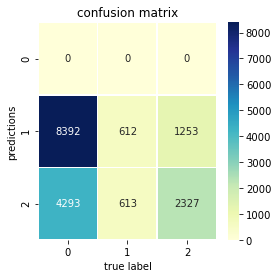

In [416]:
f1_macro = f1_score(df["label_polarity"], df["AAPz_target"], average="macro")
acc = accuracy_score(df["label_polarity"], df["AAPz_target"])*100
print("f1_macro :", round(f1_macro, 3))
print("accuracy:", round(acc,3), "%")
confusion_matrix = metrics.confusion_matrix(df["label_polarity"], df["AAPz_target"])
f,ax = plt.subplots(figsize=(4,4))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt= "d",ax=ax, cmap="YlGnBu");
plt.title("confusion matrix")
plt.xlabel("true label");
plt.ylabel("predictions");

In [417]:
df_remove_0 = df[df.AAPz_target != 0]
df_remove_0.shape

(16265, 24)

f1_macro : 0.152
accuracy: 14.307 %


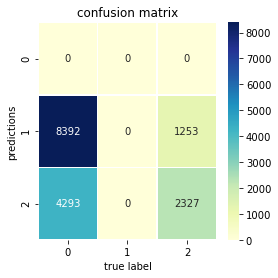

In [418]:
f1_macro = f1_score(df_remove_0["label_polarity"], df_remove_0["AAPz_target"], average="macro")
acc = accuracy_score(df_remove_0["label_polarity"], df_remove_0["AAPz_target"])*100
print("f1_macro :", round(f1_macro, 3))
print("accuracy:", round(acc,3), "%")
confusion_matrix = metrics.confusion_matrix(df_remove_0["label_polarity"], df_remove_0["AAPz_target"])
f,ax = plt.subplots(figsize=(4,4))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt= "d",ax=ax, cmap="YlGnBu");
plt.title("confusion matrix")
plt.xlabel("true label");
plt.ylabel("predictions");

In [419]:
print("Report of MultinomialNB Polarity")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB Polarity
Confusion Matrix 
 [[2752  308]
 [1868  319]]
              precision    recall  f1-score   support

           0       0.60      0.90      0.72      3060
           1       0.51      0.15      0.23      2187

    accuracy                           0.59      5247
   macro avg       0.55      0.52      0.47      5247
weighted avg       0.56      0.59      0.51      5247

Accuracy Score:  0.5852868305698494


In [420]:
print("Report of LinearSVC Polarity")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC Polarity
Confusion Matrix 
 [[2126  934]
 [1341  846]]
              precision    recall  f1-score   support

           0       0.61      0.69      0.65      3060
           1       0.48      0.39      0.43      2187

    accuracy                           0.57      5247
   macro avg       0.54      0.54      0.54      5247
weighted avg       0.56      0.57      0.56      5247

Accuracy Score:  0.5664189060415475


In [421]:
print("Report of LogisticRegression Polarity")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression Polarity
Confusion Matrix 
 [[2257  803]
 [1453  734]]
              precision    recall  f1-score   support

           0       0.61      0.74      0.67      3060
           1       0.48      0.34      0.39      2187

    accuracy                           0.57      5247
   macro avg       0.54      0.54      0.53      5247
weighted avg       0.55      0.57      0.55      5247

Accuracy Score 0.5700400228702116


# Multiclass Classification

* after removing datapoints that had been annotated as trust or anticipation

In [422]:
data = df[["text_clean", "label_1", "ang", "fear", "disg", "hap", "sad", "surp", "target","AAPz_target", "label_polarity"]]

In [423]:
anticipation = data[data["label_1"] == 2].index
data = data.drop(anticipation, inplace= False)

In [424]:
trust = data[data["label_1"] == 8].index
data = data.drop(trust, inplace= False)

In [425]:
data = data.reset_index(drop=True)

In [426]:
data.shape

(12100, 11)

In [427]:
data.target.value_counts()

4    4927
5    4079
6    1880
7     652
1     490
3      72
Name: target, dtype: int64

In [428]:
data.label_1.value_counts()

1    3703
5    1843
4    1791
6    1702
3    1639
7    1422
Name: label_1, dtype: int64

In [429]:
X = data["text_clean"]
y_target = data["target"]
y_label = data["label_1"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [430]:
print("Report of MultinomialNB")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test_l,predictions)
print("Confusion Matrix \n",confusion_matrix)
print(metrics.classification_report(y_test_l,predictions, zero_division = 0))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB
Confusion Matrix 
 [[  0   0 842 290   5   1]
 [  0   0 333 143   9   0]
 [  0   0 426 115   5   0]
 [  0   0 242 280  14   1]
 [  0   0 388 117   8   0]
 [  0   0 284 121   6   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1138
           3       0.00      0.00      0.00       485
           4       0.17      0.78      0.28       546
           5       0.26      0.52      0.35       537
           6       0.17      0.02      0.03       513
           7       0.00      0.00      0.00       411

    accuracy                           0.20      3630
   macro avg       0.10      0.22      0.11      3630
weighted avg       0.09      0.20      0.10      3630

Accuracy Score:  0.19669421487603306


classes [1 3 4 5 6 7]


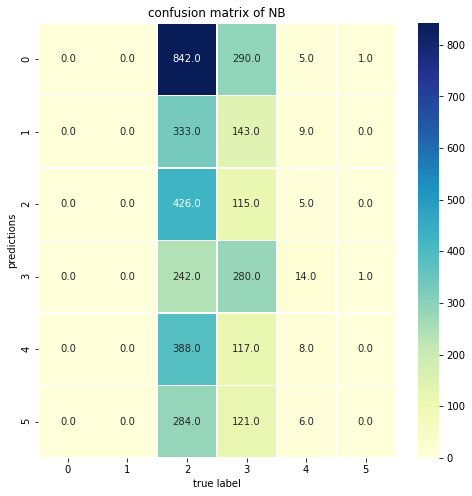

In [431]:
print("classes",text_clf_nb.classes_)
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu");
plt.title("confusion matrix of NB")
plt.xlabel("true label");
plt.ylabel("predictions");

In [432]:
print("Report of LinearSVC")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test_l,predictions)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC
Confusion Matrix 
 [[ 24   1 600 375 109  29]
 [  8   2 210 174  82   9]
 [ 16   0 284 157  72  17]
 [  2   0 138 269  85  43]
 [ 13   0 274 143  65  18]
 [ 12   0 179 139  64  17]]
              precision    recall  f1-score   support

           1       0.32      0.02      0.04      1138
           3       0.67      0.00      0.01       485
           4       0.17      0.52      0.25       546
           5       0.21      0.50      0.30       537
           6       0.14      0.13      0.13       513
           7       0.13      0.04      0.06       411

    accuracy                           0.18      3630
   macro avg       0.27      0.20      0.13      3630
weighted avg       0.28      0.18      0.12      3630

Accuracy Score:  0.18209366391184573


classes: [1 3 4 5 6 7]


Text(0.5, 1.0, 'confusion matrix of SVC')

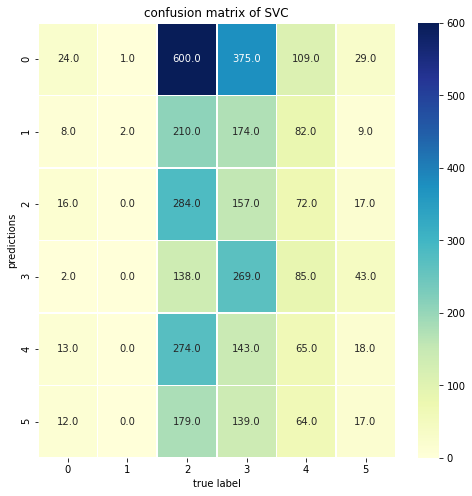

In [433]:
f,ax = plt.subplots(figsize=(8,8))
print("classes:" ,text_clf_lsvc.classes_)   
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu");
plt.xlabel("true label");
plt.ylabel("predictions");
plt.title("confusion matrix of SVC")

# Polarity 2

In [434]:
data["target_polarity"] = data["target"].map({1:0, 3:0, 4:0, 5:1, 6:0, 7:0})
X = data["text_clean"]
y_target = data["target_polarity"]
y_label = data["label_polarity"]

X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [435]:
data.label_polarity.value_counts()

0    10257
1     1843
Name: label_polarity, dtype: int64

In [436]:
data.target_polarity.value_counts()

0    8021
1    4079
Name: target_polarity, dtype: int64

In [437]:
print("Report of MultinomialNB Polarity 2")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB Polarity 2
Confusion Matrix 
 [[2880  213]
 [ 452   85]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      3093
           1       0.29      0.16      0.20       537

    accuracy                           0.82      3630
   macro avg       0.57      0.54      0.55      3630
weighted avg       0.78      0.82      0.79      3630

Accuracy Score:  0.8168044077134986


In [438]:
print("Report of LinearSVC Polarity 2")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC Polarity 2
Confusion Matrix 
 [[2233  860]
 [ 301  236]]
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      3093
           1       0.22      0.44      0.29       537

    accuracy                           0.68      3630
   macro avg       0.55      0.58      0.54      3630
weighted avg       0.78      0.68      0.72      3630

Accuracy Score:  0.6801652892561983


In [439]:
print("Report of LogisticRegression Polarity")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression Polarity
Confusion Matrix 
 [[2387  706]
 [ 346  191]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      3093
           1       0.21      0.36      0.27       537

    accuracy                           0.71      3630
   macro avg       0.54      0.56      0.54      3630
weighted avg       0.78      0.71      0.74      3630

Accuracy Score 0.7101928374655647


# Evaluating the performance of SentiArt by comparing the true scores to the predicted scores

f1_macro : 0.197
accuracy: 13.149 %


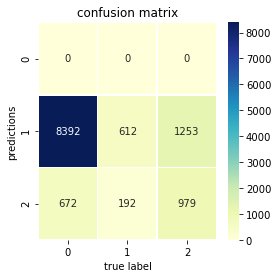

In [440]:
f1_macro = f1_score(data["label_polarity"], data["AAPz_target"], average="macro")
acc = accuracy_score(data["label_polarity"], data["AAPz_target"])*100
print("f1_macro :", round(f1_macro, 3))
print("accuracy:", round(acc,3), "%")
confusion_matrix = metrics.confusion_matrix(data["label_polarity"], data["AAPz_target"])
f,ax = plt.subplots(figsize=(4,4))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt= "d",ax=ax, cmap="YlGnBu");
plt.title("confusion matrix")
plt.xlabel("true label");
plt.ylabel("predictions");

In [441]:
data_remove_0 = data[data.AAPz_target != 0]
data_remove_0.shape

(11296, 12)

f1_macro : 0.168
accuracy: 8.667 %


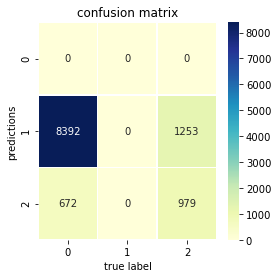

In [442]:
f1_macro = f1_score(data_remove_0["label_polarity"], data_remove_0["AAPz_target"], average="macro")
acc = accuracy_score(data_remove_0["label_polarity"], data_remove_0["AAPz_target"])*100
print("f1_macro :", round(f1_macro, 3))
print("accuracy:", round(acc,3), "%")
confusion_matrix = metrics.confusion_matrix(data_remove_0["label_polarity"], data_remove_0["AAPz_target"])
f,ax = plt.subplots(figsize=(4,4))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt= "d",ax=ax, cmap="YlGnBu");
plt.title("confusion matrix")
plt.xlabel("true label");
plt.ylabel("predictions");